## Introduction

This notebook shows how to plot complex helixes and the output is Figure X in the textbook "blah". This is done in Python3.

## Imports

Some standard imports for making 3D plots with matplotlib as well as handling arrays with numpy.

In [1]:
# Make upcoming figure interactive for this tutorial (has to be before matplotlib import)
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## Setting signal parameters

Some decisions need to be made about the signal to be plotted. Sampling rate (`fs`), duration (`T`) and the frequency of the signal (`f`) are all set here.

In [2]:
fs = 1000 # sampling rate in Hz
T = 0.5   # duration in s
f = 10    # signal frequency in Hz

## Building the signal

Now we apply the formula for building a complex signal (see textbook p. XXX). First we must make an array of times at the sampling rate from which we can build the signal.

In [3]:
t = np.linspace(0, T, T*fs)   # array of time steps
s_t = np.exp(1j*2*np.pi*f*t) # s(t) in complex notation


## Plotting the signal in 3D

Plotting the signal in 3D requires plotting each of the three projections (real axis, imaginary axis, and the IQ plane) then plotting the helix on top of them.

In [4]:
# set offsets to move the axes away from the helix
t_offset = 0.3
re_offset = 0.8
im_offset = 0.8

<IPython.core.display.Javascript object>


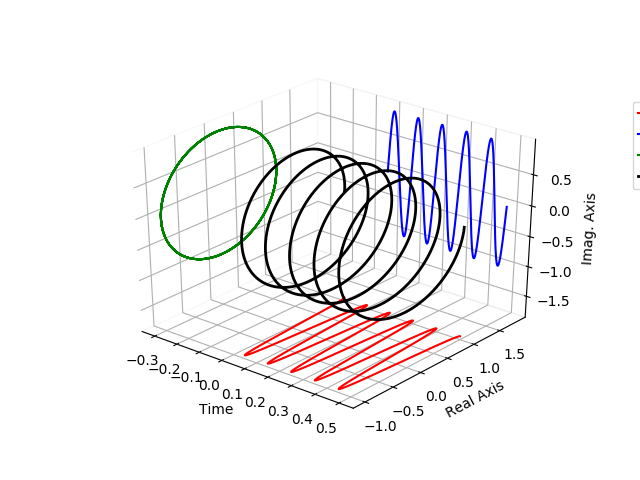

In [5]:
# instantiate a figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# remove background color from plot
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Set axis limits and labels
ax.set_xlim3d = (t_offset, np.max(t) + t_offset)
ax.set_ylim3d = (-1-re_offset, 1+re_offset)
ax.set_zlim3d = (-1-im_offset, 1+im_offset)
ax.set_xlabel('Time')
ax.set_ylabel('Real Axis')
ax.set_zlabel('Imag. Axis')

# plot projections
ax.plot(t, np.real(s_t), np.zeros_like(t)-1-re_offset, label='Re{s(t)}', color='red', linewidth = 1.5) # real projection
ax.plot(t, np.zeros_like(t)+1+im_offset, np.imag(s_t), label='Im{s(t)}', color='blue', linewidth = 1.5) # imaginary projection
ax.plot(np.zeros_like(t)-t_offset, np.real(s_t), np.imag(s_t), label='Constellation', color='green', linewidth = 1.5) # constellation projection

# plot helix
ax.plot(t, np.real(s_t), np.imag(s_t), label='s(t)', color='black', linewidth=2.0) # 3d helix

# add a legend
plt.legend(bbox_to_anchor=(1.1, 0.9))
